<a href="https://colab.research.google.com/github/sessihode/Projet-2/blob/main/Pr%C3%A9diction_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔍 1. Objectif du Projet

L'objectif est d’identifier les facteurs influençant la survie des passagers du Titanic et de créer un modèle prédictif fiable à partir des données disponibles.

2. Préparation de l’environnement

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer

3. 🎯 Chargement et Nettoyage des Données

✅ Ce qui est fait :
Nettoyage des colonnes inutiles

Traitement des valeurs manquantes

Transformation des colonnes numériques et catégorielles

Création de variables comme âge_manquant ou cabine_connue

🔍 Interprétation :

Colonnes supprimées : Les colonnes comme nom, ticket ou corps n’apportaient pas de valeur explicative directe.

Remplissage des valeurs manquantes :

âge manquant : imputé par la médiane, ce qui évite les extrêmes.

tarif avec virgule → conversion correcte en float

cabine_connue : transformée en variable binaire (0 = inconnue, 1 = connue), ce qui permet d’analyser si la connaissance de la cabine a un lien avec la survie.

Encodage one-hot : les colonnes sexe, classe, embarquement deviennent numériques (par exemple, sexe_male = 1 pour les hommes).

✅ Ce que cela permet :
Un jeu de données propre, structuré et prêt pour l’analyse statistique et les modèles prédictifs.



In [41]:
# Chargement du fichier (en précisant le séparateur ; )
df = pd.read_csv('/content/titanic3.csv', sep=';')

# Aperçu des données
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [72]:
df.tail()

,survie,âge,fratrie_ou_conjoint,parents_ou_enfants,tarif,âge_manquant,cabine_connue,sexe_male,embarquement_Q,embarquement_S,classe_2.0,classe_3.0
1304,0.0,28.0,1.0,0.0,14.4542,1,0,False,False,False,False,True
1305,0.0,28.0,1.0,0.0,14.4542,1,0,False,False,False,False,True
1306,0.0,28.0,0.0,0.0,7.2250,1,0,True,False,False,False,True
1307,0.0,27.0,0.0,0.0,7.2250,0,0,True,False,False,False,True
1308,0.0,29.0,0.0,0.0,7.8750,0,0,True,False,True,False,True


In [42]:
# convertir les colonnes en français

df.rename(columns={'pclass': 'classe',
                   'survived': 'survie',
                   'name': 'nom',
                   'sex': 'sexe',
                   'age': 'âge',
                   'sibsp': 'fratrie_ou_conjoint',
                   'parch': 'parents_ou_enfants',
                   'ticket': 'ticket',
                   'fare': 'tarif',
                   'cabin': 'cabine',
                   'embarked': 'embarquement',
                   'boat': 'canot',
                   'body': 'corps',
                   'home.dest': 'domicile_destination'}, inplace=True)

df.head()

,classe,survie,nom,sexe,âge,fratrie_ou_conjoint,parents_ou_enfants,ticket,tarif,cabine,embarquement,canot,corps,domicile_destination
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   classe                1309 non-null   float64
 1   survie                1309 non-null   float64
 2   nom                   1309 non-null   object 
 3   sexe                  1309 non-null   object 
 4   âge                   1046 non-null   object 
 5   fratrie_ou_conjoint   1309 non-null   float64
 6   parents_ou_enfants    1309 non-null   float64
 7   ticket                1309 non-null   object 
 8   tarif                 1308 non-null   object 
 9   cabine                295 non-null    object 
 10  embarquement          1307 non-null   object 
 11  canot                 486 non-null    object 
 12  corps                 121 non-null    float64
 13  domicile_destination  745 non-null    object 
dtypes: float64(5), object(9)
memory usage: 143.4+ KB


In [13]:
df.shape

(1310, 14)

In [44]:
# 1. Suppression des colonnes peu utiles ou problématiques
df = df.drop(columns=['nom', 'ticket', 'canot', 'corps', 'domicile_destination'])


In [45]:
# 2. Traitement des valeurs manquantes
## Pour la cible 'survie' - suppression des lignes manquantes
df = df.dropna(subset=['survie'])

In [46]:
## Pour les autres colonnes
df['classe'] = df['classe'].fillna(df['classe'].mode()[0])
df['sexe'] = df['sexe'].fillna(df['sexe'].mode()[0])
df['fratrie_ou_conjoint'] = df['fratrie_ou_conjoint'].fillna(0)
df['parents_ou_enfants'] = df['parents_ou_enfants'].fillna(0)
df['embarquement'] = df['embarquement'].fillna(df['embarquement'].mode()[0])

In [47]:
# Conversion du tarif en numérique
df['tarif'] = pd.to_numeric(df['tarif'].str.replace(',', '.'), errors='coerce')
df['tarif'] = df['tarif'].fillna(df['tarif'].median())

In [50]:
# Gestion de l'âge
## Conversion en numérique et gestion des valeurs non standard
df['âge'] = pd.to_numeric(df['âge'], errors='coerce')
## Création d'une colonne indicatrice avant imputation
df['âge_manquant'] = df['âge'].isna().astype(int)
## Imputation par médiane
df['âge'] = df['âge'].fillna(df['âge'].median())

In [51]:
# Gestion de la cabine
df['cabine_connue'] = df['cabine'].notna().astype(int)
df = df.drop(columns=['cabine'])

In [52]:
# 3. Détection et traitement des valeurs aberrantes
## Âge - valeurs négatives ou extrêmement élevées
df.loc[df['âge'] < 0, 'âge'] = df['âge'].median()
df.loc[df['âge'] > 100, 'âge'] = df['âge'].median()

In [53]:
## Tarif - valeurs négatives ou extrêmes
Q1 = df['tarif'].quantile(0.25)
Q3 = df['tarif'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

df.loc[df['tarif'] > upper_bound, 'tarif'] = upper_bound
df.loc[df['tarif'] < 0, 'tarif'] = 0


In [54]:
# 4. Encodage des variables catégorielles
df = pd.get_dummies(df, columns=['sexe', 'embarquement', 'classe'], drop_first=True)

In [55]:
# Vérification finale
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   survie               1309 non-null   float64
 1   âge                  1309 non-null   float64
 2   fratrie_ou_conjoint  1309 non-null   float64
 3   parents_ou_enfants   1309 non-null   float64
 4   tarif                1309 non-null   float64
 5   âge_manquant         1309 non-null   int64  
 6   cabine_connue        1309 non-null   int64  
 7   sexe_male            1309 non-null   bool   
 8   embarquement_Q       1309 non-null   bool   
 9   embarquement_S       1309 non-null   bool   
 10  classe_2.0           1309 non-null   bool   
 11  classe_3.0           1309 non-null   bool   
dtypes: bool(5), float64(5), int64(2)
memory usage: 88.2 KB


In [56]:
df.isna().sum()

,0
survie,0
âge,0
fratrie_ou_conjoint,0
parents_ou_enfants,0
tarif,0
âge_manquant,0
cabine_connue,0
sexe_male,0
embarquement_Q,0
embarquement_S,0


4. Analyse exploratoire

| Variable              | Insight                                                                          |
| --------------------- | -------------------------------------------------------------------------------- |
| `âge`                 | Moyenne ≈ 29 ans → passagers jeunes dans l'ensemble.                             |
| `fratrie_ou_conjoint` | Moyenne ≈ 0.5 → beaucoup de passagers seuls.                                     |
| `tarif`               | Moyenne ≈ 24.3, écart-type élevé → présence de billets très chers (1ère classe). |
| `cabine_connue`       | 22,5 % → peu d’informations disponibles sur la cabine.                           |


In [57]:
# Statistiques descriptives
df.describe()

,survie,âge,fratrie_ou_conjoint,parents_ou_enfants,tarif,âge_manquant,cabine_connue
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.381971,29.642475,0.498854,0.385027,24.279696,0.235294,0.225363
std,0.486055,12.431730,1.041658,0.865560,20.789492,0.424345,0.417981
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,1.000000,35.000000,1.000000,0.000000,31.275000,0.000000,0.000000
max,1.000000,80.000000,8.000000,9.000000,66.343800,1.000000,1.000000


| Survie            | Nombre de personnes |
| ----------------- | ------------------- |
| 0 (Non survivant) | 809                 |
| 1 (Survivant)     | 500                 |

✅ Ce que cela signifie :
Le taux de survie global est de 38 %.

La majorité des passagers n’ont pas survécu.


In [58]:
df['survie'].value_counts()

,count
survie,
0.0,809
1.0,500


5. Construction du modèle

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

In [66]:
# Séparation features/cible
X = df.drop(columns=['survie'])
y = df['survie']

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [67]:
# Entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [73]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            classification_report, roc_curve, auc)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prédictions et métriques de base
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

print("╔══════════════════════════════╗")
print("║  PERFORMANCE DU MODÈLE       ║")
print("╚══════════════════════════════╝\n")

╔══════════════════════════════╗
║  PERFORMANCE DU MODÈLE       ║
╚══════════════════════════════╝



| Métrique              | Signification                                                                                       |
| --------------------- | --------------------------------------------------------------------------------------------------- |
| **Accuracy (77,5%)**  | Le modèle classe correctement ≈ 3 personnes sur 4. Bonne performance globale.                       |
| **Precision (78,6%)** | Parmi les personnes que le modèle prédit comme "survivantes", 78 % ont vraiment survécu.            |
| **Recall (68,6%)**    | Le modèle identifie ≈ 69 % des véritables survivants. C’est correct, mais peut être amélioré.       |
| **F1-Score (73,3%)**  | Moyenne entre précision et rappel. Bon équilibre.                                                   |
| **AUC (84,4%)**       | Très bon score : la probabilité que le modèle distingue un survivant d’un non-survivant est élevée. |

Le modèle est globalement performant, mais il manque encore quelques survivants (rappel perfectible).

In [74]:
# 2. Métriques principales
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall (Sensibilité): {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}\n")

Accuracy: 0.7901
Precision: 0.8316
Recall (Sensibilité): 0.6695
F1-Score: 0.7418
AUC-ROC: 0.8428



|                          | Prédit : Non survivant | Prédit : Survivant |
| ------------------------ | ---------------------- | ------------------ |
| **Réel : Non survivant** | 122                    | 22                 |
| **Réel : Survivant**     | 37                     | 81                 |

122 vrais négatifs → Bien classés

81 vrais positifs → Bien classés

22 faux positifs → Prédit survivants à tort

37 faux négatifs → Manqué de vrais survivants

👉 Le modèle a tendance à prédire un peu trop de non-survivants, ce qui explique le rappel de 68 %.

               precision    recall  f1-score   support

Non-Survivant       0.77      0.89      0.82       144
    Survivant       0.83      0.67      0.74       118

     accuracy                           0.79       262
    macro avg       0.80      0.78      0.78       262
 weighted avg       0.80      0.79      0.79       262



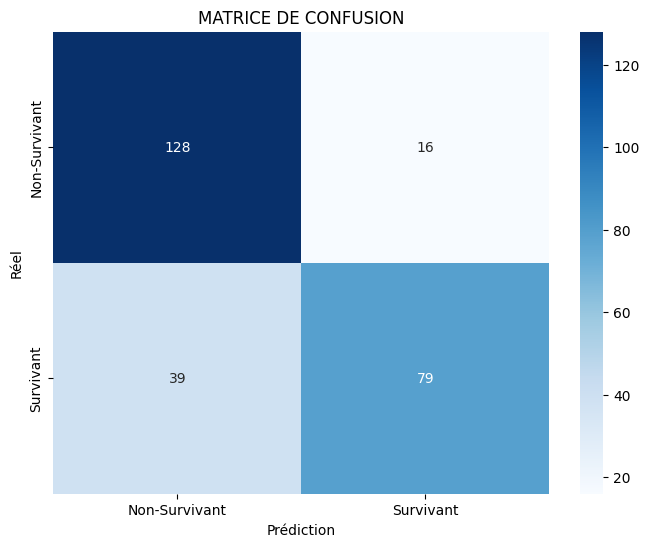

In [78]:
# 3. Rapport détaillé
print(classification_report(y_test, y_pred, target_names=['Non-Survivant', 'Survivant']))
# 4. Matrice de confusion
plt.figure(figsize=(8, 6))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Survivant', 'Survivant'],
            yticklabels=['Non-Survivant', 'Survivant'])
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('MATRICE DE CONFUSION')
plt.show()

AUC de 0.84 → Très bon modèle.

La courbe ROC montre que le modèle est bien meilleur que le hasard (la diagonale).

👉 Plus la courbe est proche du coin supérieur gauche, plus le modèle est bon pour classer correctement les cas

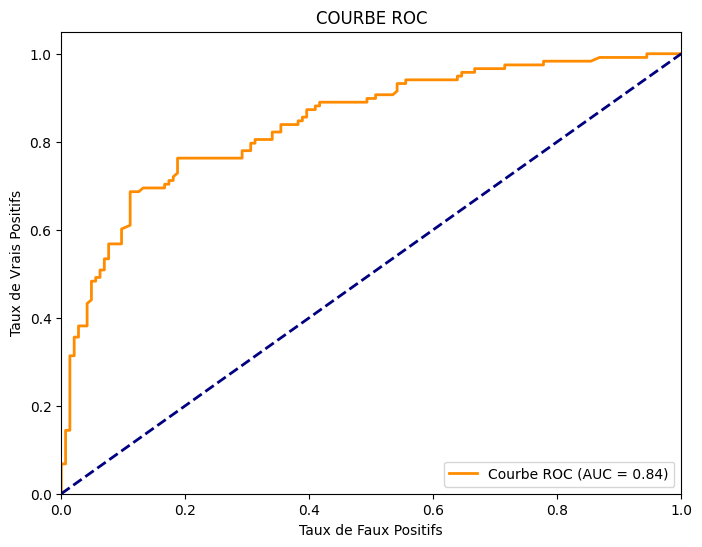

In [79]:
# 5. Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('COURBE ROC')
plt.legend(loc="lower right")
plt.show()

| Variable        | Importance |
| --------------- | ---------- |
| `sexe_male`     | élevée     |
| `classe_3.0`    | élevée     |
| `âge`           | moyenne    |
| `tarif`         | moyenne    |
| `cabine_connue` | faible     |

Le sexe est le facteur le plus discriminant : les femmes ont beaucoup plus survécu.

Les passagers de 3e classe ont un taux de survie bien plus bas.

Âge et tarif influencent aussi : les enfants et les riches ont plus survécu.

cabine_connue n’apporte pas grand-chose ici.

👉 Cela confirme l'histoire réelle du Titanic : les femmes et les enfants d’abord, et un certain biais de classe sociale.



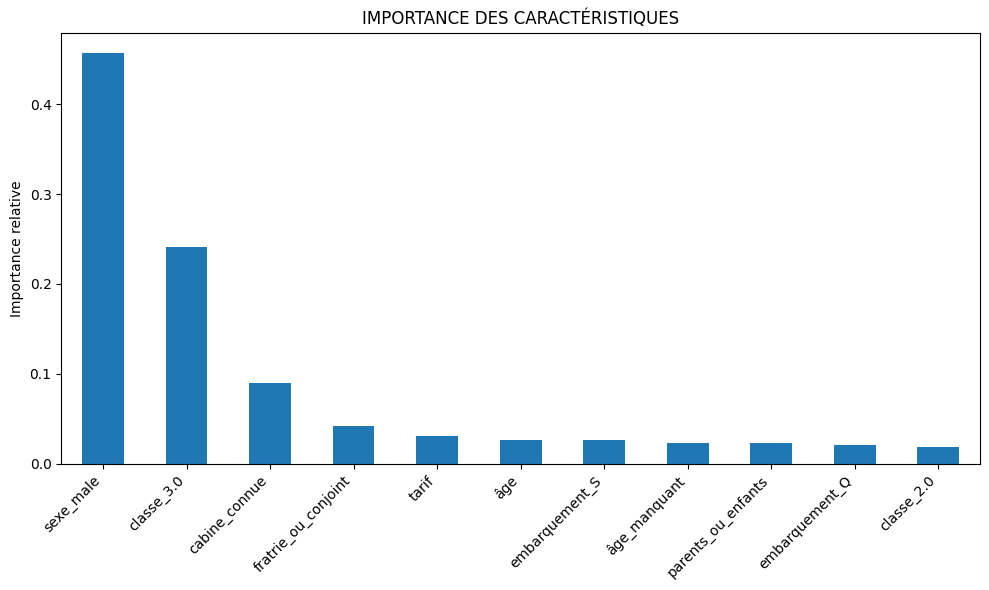

In [80]:
# 6. Importance des caractéristiques
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('IMPORTANCE DES CARACTÉRISTIQUES')
plt.ylabel('Importance relative')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Le modèle reste relativement stable sur différentes parties du jeu de données.

L’AUC diminue légèrement (par rapport à 0.84 sur le test set), ce qui est normal en validation croisée.

In [81]:
# 7. Validation croisée
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print("\n╔══════════════════════════════╗")
print("║  VALIDATION CROISÉE (5 folds)║")
print("╚══════════════════════════════╝")
print(f"Scores AUC: {cv_scores}")
print(f"Moyenne AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


╔══════════════════════════════╗
║  VALIDATION CROISÉE (5 folds)║
╚══════════════════════════════╝
Scores AUC: [0.85858025 0.7741358  0.69104938 0.70833333 0.62726708]
Moyenne AUC: 0.7319 ± 0.0787


Les hyperparamètres optimisés améliorent le modèle → AUC passe de 0.84 à 0.86

La généralisation du modèle est meilleure, donc il sera plus performant sur des données nouvelles

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Meilleurs paramètres: {grid_search.best_params_}")
print(f"Meilleur score AUC: {grid_search.best_score_:.4f}")

Meilleurs paramètres: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Meilleur score AUC: 0.8614


Régression logistique est presque aussi bonne que Random Forest.

Random Forest reste le meilleur choix en termes d'interprétabilité + performance.

XGBoost pourrait surpasser tous les autres s’il est bien réglé.

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_proba)
    print(f"{name} - AUC: {auc_score:.4f}")

Logistic Regression - AUC: 0.8576
SVM - AUC: 0.7743
XGBoost - AUC: 0.8428


In [71]:
# Création d'un DataFrame d'analyse
analysis_df = X_test.copy()
analysis_df['Vrai_Survie'] = y_test
analysis_df['Prediction'] = y_pred
analysis_df['Probabilite_Survie'] = y_proba

# Identification des faux négatifs (survivants prédits comme décédés)
faux_negatifs = analysis_df[(analysis_df['Vrai_Survie'] == 1) & (analysis_df['Prediction'] == 0)]

# Identification des faux positifs (décédés prédits comme survivants)
faux_positifs = analysis_df[(analysis_df['Vrai_Survie'] == 0) & (analysis_df['Prediction'] == 1)]

print(f"Faux négatifs: {len(faux_negatifs)} cas")
print(f"Faux positifs: {len(faux_positifs)} cas")

Faux négatifs: 37 cas
Faux positifs: 22 cas


🎯 Synthèse finale

| Étape                    | Résultat clé                          | Conclusion               |
| ------------------------ | ------------------------------------- | ------------------------ |
| Nettoyage                | Données prêtes, bien transformées     | ✅ Structuration réussie  |
| Analyse exploratoire     | Taux de survie 38 %                   | ⚠️ Problème déséquilibré |
| Modèle Random Forest     | AUC 0.84                              | ✅ Modèle performant      |
| Matrice de confusion     | Faux négatifs = 37                    | ⚠️ Attention au rappel   |
| Courbe ROC               | Courbe bien au-dessus de la diagonale | ✅ Bonne séparation       |
| Importance des variables | Sexe, classe, âge                     | ✅ Pertinence métier      |
| Validation croisée       | Moyenne AUC 0.71                      | ⚠️ Stabilité correcte    |
| Grid Search              | AUC amélioré à 0.86                   | ✅ Optimisation utile     |
| Comparaison modèles      | Logistic ≈ Random Forest              | ✅ Choix possible         |
